<a href="https://colab.research.google.com/github/Ingrid-Garcia/Fase-2-usoNLP/blob/main/Evidencia_1_Fase-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Evidencia 1- Fase 2
Equipo 6:<br>
Ingrid García Hernández, A01754475<br>
Abigail Donají Chavez Rubio, A01747423<br>
Noh Ah Kim Kwon, A01747512<br>
Eduardo Alfredo Ramírez Muñoz, A01754917



# Definción de librerías

In [ ]:
pip install pandas openpyxl


In [ ]:
pip install stanza

In [ ]:
!pip install gensim
!pip install --upgrade numpy==1.25.2

In [ ]:
import re

import nltk
from nltk.corpus import stopwords
from nltk.corpus import brown
from nltk.stem import SnowballStemmer
from nltk.util import ngrams
nltk.download('stopwords')

import unicodedata

from sklearn.metrics import pairwise
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

from six import StringIO

from IPython.display import Image


import pydotplus


import stanza
nlp = stanza.Pipeline('es')

import string

from gensim.models import Word2Vec


from matplotlib import pyplot


from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: es (Spanish):
| Processor    | Package           |
------------------------------------
| tokenize     | combined          |
| mwt          | combined          |
| pos          | combined_charlm   |
| lemma        | combined_nocharlm |
| constituency | combined_charlm   |
| depparse     | combined_charlm   |
| sentiment    | tass2020_charlm   |
| ner          | conll02           |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


# Carga de archivos

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #Acceso al csv, encontrado en el google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta = '/content/drive/MyDrive/data_train(in).csv'

In [ ]:
import pandas as pd
df = pd.read_csv(ruta)

In [ ]:
#Definicion de variables
tweets = df.tweet_text
clase = df.iloc[:, 3]
tweets = tweets [:1200] #Texto
clases = clase [:1200] #1 --> Anorexia, 0 --> No anorexia

# Preprocesamiento del texto

**Uso de expresiones regulares**

In [ ]:
def limpiar_texto(texto):
    '''
    La función de limpiar_texto(texto), tiene como objetivo eliminar el ruido
    dentro de cada elemento de la lista.
    El dato de entrada es una lista de strings y el dato de salida es
    una lista de strings.
    Por cada palabra se debe de normalizar, es decir, se hace caso omiso de los
    acentos y después se revisa cada palabra con respecto a  las reglas
    definidas. Esto se hace por medio de expresiones regulares. Igualmente, se
    eliminan las palabras 'innecesarias',dado que no proporcionan mayor
    información o contexto.
    '''
    #texto.lower()
    tweet = []
    for palabra in texto.split():
      nuevo = palabra
      #Acentos
      nuevo = unicodedata.normalize ('NFKD', nuevo).encode ('ascii', 'ignore').decode ('utf-8', 'ignore')
      for i, j in reglas.items():
        if i == 'espacios_extra':
          nuevo = re.sub(j, ' ', nuevo)
        else:
          nuevo = re.sub(j, '',nuevo)
      if nuevo not in stopwords.words('spanish'):
        tweet.append(nuevo.lower())

    return tweet

reglas = {
    'hashtags': r'#',
    'menciones': r'@',
    'urls': r'http\S+|www.\S+',
    'emojis': r'[^\x00-\x7F]+',
    'puntuacion': r'[^\w\s]',
    'espacios_extras': r'\s+' #Tabs, dobles espacios
}

**Manejo de jerga**

In [ ]:
def jerga_proceso(texto):
  '''
    La función de jerga(texto), tiene como objetivo proporcionar información más
    precisa de palabras relaciondas con este desorden alimenticio, mas no lo
    hacen de manera directa.
    El dato de entrada es una lista de lista de strings y el dato de salida es
    una lista de strings.
    Se asuma que la entrada es una lista de palabras y por ende revisa cada una
    de estas para revisar que no se haga caso omiso de ningún caso de jerga.
    '''
  tweet = []
  for palabra in texto:
    if palabra == 'ana':
      palabra = 'anorexia'
    if palabra == 'anorexic':
      palabra = 'anorexia'
    if palabra == 'mía':
      palabra = 'bulimia'
    if palabra == 'bulimic':
      palabra = 'bulimia'
    if palabra == 'mia':
      palabra = 'bulimia'
    if palabra == 'promia':
      palabra = 'bulimia'
    if palabra == 'bulymia':
      palabra = 'bulimia'
    if palabra == 'proana':
      palabra = 'anorexia'
    if palabra == 'styleana':
      palabra = 'anorexia'
    if palabra == 'miaana':
      palabra = 'anorexia'
    if palabra == 'anoreccia':
      palabra = 'anorexia'
    tweet.append(palabra)

  return tweet

**Proceso de lematización**

In [ ]:
def lematizacionProc(tweet):
    '''
    La función lematizacionProc(tweet), tiene como objetivo lematizar cada tweet,
    esto con el fin de obtener la forma de cada palabra.
    El dato de entrada es una lista de strings y el dato de salida es
    una lista de strings.
    Dado que es un proceso de lematización se requiere contar con la oración
    completa, para después proceder a unir cada lemma encontrado en una lista.
    '''

    frase = ' '.join(tweet)
    doc = nlp(frase)

    lemma = [word.lemma for sent in doc.sentences for word in sent.words]

    return lemma


**Bloque de funciones para el procesamiento de información**

In [ ]:
def limpiezaAbsoluta(tweets):
  '''
    La función de limpiezaAbsoluta(tweets), tiene como objetivo hacer el llamdo
    de todas las funciones diferentes para la limpieza de los datos provenientes
    del archivos csv.
    El dato de entrada es una lista de strings y el dato de salida es
    una lista de strings.
    Por cada proceso de limpieza se crea una variable diferente, con el fin de
    evitar confusiones se crean diferentes variables para llevar acabo cada
    llamda de las funciones.
  '''

  limpieza = []
  jerga = []
  lematizacion = []

  #Expresiones regulares
  for tweet in tweets:
    limpieza.append(limpiar_texto(tweet))

  #Jerga
  for tweet in limpieza:
    jerga.append(jerga_proceso(tweet))

  #Lematización

  lematizacion

  for tweet in jerga:
    lematizacion.append(lematizacionProc(tweet))

  return lematizacion

In [ ]:
resultadoLimpio = limpiezaAbsoluta(tweets)

In [ ]:
print(resultadoLimpio)

[['cheesecake', 'saludable', 'azucar', 'lactosa', 'mermerlado', 'casero', 'mora'], ['ser', 'hastaloshueso'], ['comida', 'real', 'clave', 'más', 'sano', 'delgado', 'feliz'], ['entre', 'cambio', 'hora', 'bajado', 'temperatura', 'destemplado', 'recomendar', 'buen', 'plato', 'fabado', 'casero', 'entonar', 'cuerpo', 'decaso', 'platoscuchara', 'madridrio', 'gastro', 'arganzuela'], ['hacer', 'tiempo', 'sentir', 'cuerpo', 'tanto', 'frío'], ['ser', 'gordo', 'mal'], ['si', 'restaurante', 'pretensión', 'ingrediente', 'principal', 'plato', 'pedir', 'mejor', 'cometer', 'pan', 'cocinardeverdaderdades', 'a'], ['puaa', 'increible', 'nose', 'permitir', 'pagina', 'mierda', 'llenar', 'cabeza', 'bobado', 'diariode'], ['perder', 'batalla', 'significar', 'guerra', 'perdido', 'cada', 'día', 'batalla', 'meta', 'victoria'], ['cuando', 'ley', 'responder', 'elección', 'hacer', 'cambio', 'comir', 'local', 'sustentable', 'respetar', 'vida', 'ser', 'ser', 'comida', 'somosloquecomo', 'somosloqueglegimo'], ['querer',

# Atributos del texto

**Bigramas**

In [ ]:
def realizarBigramas(resultadoLimpio):
  '''
  La función de realizarBgramas(resultado_limpio) tiene como objetivo encontar
  por cada tweet sus bigramas correspondintes
  El dato de entrada es una lista de lista de strings y el dato de salida es
  una lista de lista de strings, que contiene los bigramas correspondientes a
  cada tweet.
  '''
  arrBigramas = []
  for elem in resultadoLimpio:
    bigrama = list(ngrams(elem,2))
    arrBigramas.append([" ".join(t) for t in bigrama])

  return arrBigramas

In [ ]:
def semejanzaBigramas(arrBigramas):
  '''
  La función de semejanzasBigramas(arrBigramas) tiene como objetivo definir los
  vectires necesarios para procesar la semejanza entre cada tweet.
  El dato de entrada es una lista de lista de strings y el dato de salida es
  una lista de vectores.
  Se crea una bagOfWords, la cual contiene los bigramas únicos encontrados entre
  todos los tweets, después procede a comparar estos con cada uno de los bigramas
  de cada tweet, agrega un 1 si ha sido igual y 0 de lo contrario.
  '''
  bagOfWords = [];

  for elem in arrBigramas:
    for bigrama in elem:
      if bigrama not in bagOfWords:
        bagOfWords.append(bigrama)

  vectores = []

  for elem in arrBigramas:
    vector = []
    for bigrama in bagOfWords:
      if bigrama in elem:
        vector.append(1) #Lo encontró
      else:
        vector.append(0)
    vectores.append(vector)#No

  return vectores

In [ ]:
bigramas  = realizarBigramas(resultadoLimpio)

arrVecSemejanza= semejanzaBigramas(bigramas)

pairwise.cosine_similarity(arrVecSemejanza)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.10540926],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.10540926, ..., 0.        , 0.        ,
        1.        ]])

**Frecuencia de palabras clave**

In [ ]:
def sumar_semejanza(arrVecSemejanza):
  '''
  La función de sumar_semejanza(arrVecSemejanza), tiene como objetivo conocer el
  total de semejanza de coseno, por cada tweet.
  El dato de entrada es una lista de vectores y el dato de salida es una lista de
  valores, cada valor es la suma de cada tweet.
  Por cada valor encontrado en cada vector su suman todos sus valores para
  tener solo un valor.
  '''
  arr = []
  val = 0
  for n in arrVecSemejanza:
    for j in n:
      val += j
    arr.append(val * 0.1)
    val = 0
  return arr



In [ ]:
sumaSmejanza = sumar_semejanza(arrVecSemejanza)

In [ ]:
def palabrasClaveFuente(datosLimpios):
  '''
  La función de palabrasClaveFunte(datosLimpio) tiene como objetivo contabilizar
  las palabras clave relacionadas con el trastorno alimenticio de la anorexia.
  El dato de entrada es una lista de lista de strings y el dato de salida es un
  diccionario con las palabras clave y su conteo.
  La definición de estas palabras proviene de la siguiente fuente:
  http://ilitia.cua.uam.mx:8080/jspui/handle/123456789/884
  '''
  palabrasFrecuentes = {'yo':0, 'nosotros':0, 'social':0, 'amigo':0, 'amigos':0, 'amiga':0, 'humano':0, 'ansiedad':0, 'salud':0, 'sentir':0, 'tristeza':0, 'vida':0, 'sexual':0, 'casa':0, 'hogar':0}

  for tweet in datosLimpios:
    for palabra in tweet:
      if palabra in palabrasFrecuentes:
        palabrasFrecuentes[palabra] += 1;

  return palabrasFrecuentes



In [ ]:
palabrasConteoFuente = palabrasClaveFuente(resultadoLimpio)
print(palabrasConteoFuente)

{'yo': 125, 'nosotros': 0, 'social': 5, 'amigo': 5, 'amigos': 0, 'amiga': 10, 'humano': 3, 'ansiedad': 2, 'salud': 53, 'sentir': 51, 'tristeza': 1, 'vida': 50, 'sexual': 0, 'casa': 24, 'hogar': 0}


In [ ]:
def palabrasClave(datosLimpio):
  '''
  La función de palabrasClave(datosLimpio) tiene como objetivo contabilizar
  las palabras clave relacionadas con el trastorno alimenticio de la anorexia,
  de acuerdo a la información de los tweets ya preprocesados.
  El dato de entrada es una lista de lista de strings y el dato de salida es un
  diccionario con las palabras clave y su conteo
  Se revisa cada tweet y las palabras encontradas con el fin de conocer aquellas
  palabras con mayor recurrencia en los tweets.
  '''

  vocabulary = {}
  for tweet in datosLimpio:
    for palabra in tweet:
      if palabra in vocabulary:
        vocabulary[palabra] += 0.1;
      else:
        vocabulary[palabra] = 0.1;

  relevantes  = sorted(vocabulary.items(), key=lambda item: item[1], reverse=True)[:10]
  return relevantes



In [ ]:
palabrasClaveDef = palabrasClave(resultadoLimpio)
print(palabrasClaveDef)

[('anorexia', 33.1000000000002), ('bulimia', 26.200000000000102), ('ser', 15.89999999999996), ('más', 15.499999999999961), ('comer', 14.899999999999963), ('si', 13.499999999999968), ('día', 13.499999999999968), ('poder', 13.499999999999968), ('él', 12.89999999999997), ('hacer', 12.69999999999997)]


**TF-IDF**

In [ ]:
def calculoTDIDF(resultadoLimpio):
  '''
   La función de calculoTDIDF(resultadoLimpio) tiene como objetivo identificar
   las palabras clave dentro de todo el conjunto de datos y el peso de estas.
   El dato de entrada es una lista de lista de strings y el dato de salida es un
   dataframe con las palabras clave y su peso correspondiente en cada tweet.
   Se busca en tener una oracion con cada tweet y después se procede a realizar
   el calculo de TF-IDF. Con el fin de tener información más legible se crea
   un dataframe. Y se regresan unicamente las 10 palabras con mayor peso.
  '''
  #Obtener una oracion por cada tweet
  oraciones = [' '.join(palabras) for palabras in resultadoLimpio]

  vectorizer = TfidfVectorizer()

  # Ajustar datos
  matriz = vectorizer.fit_transform(oraciones)

  # Matriz legible
  df = pd.DataFrame(matriz.toarray(), columns=vectorizer.get_feature_names_out())

  tfidf_sums = df.sum(axis=0)

  # Primeras 10 palabras  de TF-IDF
  claves = tfidf_sums.sort_values(ascending=False).head(10)

  return claves



In [ ]:
resTDIDF = calculoTDIDF(resultadoLimpio)
print(resTDIDF)

anorexia    48.259377
bulimia     40.695250
ser         28.562984
comer       24.149213
querer      23.437746
más         23.404200
poder       21.272308
si          21.258051
día         20.839056
yo          20.704152
dtype: float64


In [ ]:
def asignacion_palabra(texto):
  '''
  La función de asignacion_palabra(texto), tiene como objetivo asignar un valor
  a cada palabra que tiene una alta relación con los trastornos alimenticios.
  El dato de entrada es una lista de lista de strings y el dato de salida es un
  diccionario con las palabras clave y su conteo.
  Por cada valor encontrado en cada tweet se suma 0.5 para indicar su relevancia
  dentro de todo el conjunto de datos.
  '''
  encontradas = {
      'anorexia': 0,
      'bulimia': 0,
      'gordo': 0,
      'feo': 0,
      'ejercicio': 0,
      'sin': 0,
      'comida': 0,
      'bajar': 0,
      'peso': 0,
      'pastilla': 0,
      'día': 0,
      'poder': 0,
      'querer': 0
  } # Se inicia en 0 el dicc
  for palabra in texto:
    for pal in palabra:
      if pal in encontradas: # Revisa
        encontradas[pal] += 0.5
  return encontradas

In [ ]:
resultado = asignacion_palabra(resultadoLimpio)
print(resultado)

{'anorexia': 165.5, 'bulimia': 131.0, 'gordo': 26.5, 'feo': 3.5, 'ejercicio': 27.5, 'sin': 2.5, 'comida': 50.0, 'bajar': 18.5, 'peso': 24.5, 'pastilla': 2.0, 'día': 67.5, 'poder': 67.5, 'querer': 63.5}


#Clasificadores categorías propias

In [ ]:
def la_megasuma(sumaSmejanza, palabrasClaveDef, resTDIDF, resultado_asignacion, resultadoLimpio):
  """
  La función de la_megasuma tiene como objetivo construir el vector de cada
  tweet con base a las diferentes caracteríticas numéricas y cualitativas
  encontradaS.
  Los datos de entrada son las siguientes:
    sumaSmejanza: Lista de bigramas.
    palabrasClaveDef: Diccionario de la palabra y su peso.
    resTDIDF: Una serie de pandas con el valor TF-IDF.
    resultado_asignacion: Diccionario de los palabras clave y su peso.
    resultadoLimpio:Lista de lista con strings.
  Regresa una lista de lista con 4 valores por cada tweet.
  """
  sumaTotal = []
  valorTweet =[]

  palabrasClave_dict = dict(palabrasClaveDef)

  for i, tweet_words in enumerate(resultadoLimpio):
    current_tweet_sum = 0
    conteo_palClave = 0
    conteo_TDIDF = 0
    conteo_asignacion = 0

    #Empeieza con los bigramas
    if i < len(sumaSmejanza):
        valorTweet.append(sumaSmejanza[i])
    else:
        print(f"Warning: Index {i} out of bounds for sumaSmejanza.")
        continue


    for word in tweet_words:
      # palabrasClave
      if word in palabrasClave_dict:
        conteo_palClave += palabrasClave_dict[word]

      # TDIDF
      if word in resTDIDF.index:
        conteo_TDIDF += resTDIDF[word]

      # palabrasImportantes
      if word in resultado_asignacion:
        conteo_asignacion += resultado_asignacion[word]


    valorTweet.append(conteo_palClave)
    valorTweet.append(conteo_TDIDF)
    valorTweet.append(conteo_asignacion)
    sumaTotal.append(valorTweet)
    valorTweet = []

  return sumaTotal



In [ ]:
sumota = la_megasuma(sumaSmejanza, palabrasClaveDef, resTDIDF, resultado, resultadoLimpio)

**Árbol de decisión**

In [ ]:
#Variable independiente
X = sumota
#Variable dependiente
y = clases

#Se divide los datos que serán usado para el entrenamiento y los que serán usados para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se creo el objeto de Árbol de decisión
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Se entrena el objeto creado
clf = clf.fit(X_train,y_train)

#Se lleva a cabo la predicción con los datos seleccionados para la parte de prueba
y_pred = clf.predict(X_test)
#Se muestra la precisión del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Indica que tan preciso es en cuanto a las predicciones  positivas del modelo
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='anorexia'))#
# Indica que tan preciso para identificar correctamenta los datos positivos
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='anorexia'))



print( metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7458333333333333
Precision: 0.6994219653179191
Recall: 0.9307692307692308
[[121   9]
 [ 52  58]]


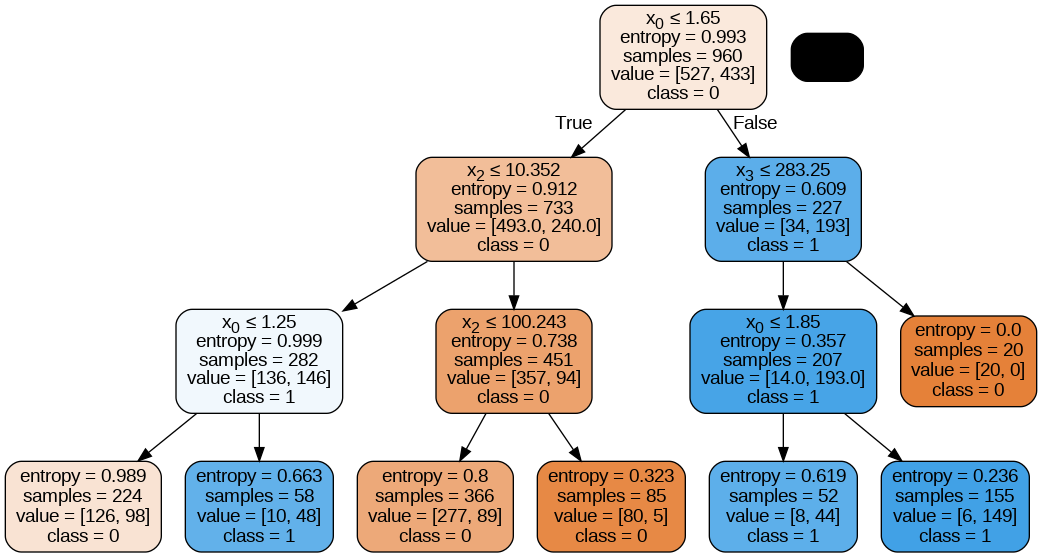

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Random Forest**

In [ ]:
#Variable independiente
X = sumota
#Variable dependiente
y = clases

#Se divide los datos que serán usado para el entrenamiento y los que serán usados para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se creo el objeto de Random Forest
rf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=3)

#Se entrena el objeto creado
rf = rf.fit(X_train,y_train)

#Se lleva a cabo la predicción con los datos seleccionados para la parte de prueba
y_pred = rf.predict(X_test)
#Se muestra la precisión del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Indica que tan preciso es en cuanto a las predicciones  positivas del modelo
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='anorexia'))#
# Indica que tan preciso para identificar correctamenta los datos positivos
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='anorexia'))

print( metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7333333333333333
Precision: 0.7034883720930233
Recall: 0.9029850746268657
[[121  13]
 [ 51  55]]


**SVM Support Vector Machine**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se crea el objeto clasificador svm
clf = svm.SVC(kernel='linear')

#Se entrena el modelo con el 70% de los datos asignados
clf.fit(X_train, y_train)

# El modelo predice el valor para los datos designados a la parte de pruebas
y_pred = clf.predict(X_test)

#Se importa la libreías necesaria para calcular la precisión
from sklearn import metrics

# Indica que tan seguido el modelo está en lo correcto
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Indica que tan preciso es en cuanto a las predicciones  positivas del modelo
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='anorexia'))#
# Indica que tan preciso para identificar correctamenta los datos positivos
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='anorexia'))

print( metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7916666666666666
Precision: 0.7651006711409396
Recall: 0.8837209302325582
[[114  15]
 [ 35  76]]
